In [13]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime
from citipy import citipy
import json
from config import weather_api_key
import time
from scipy.stats import linregress


In [14]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key


# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | brzeziny
Processing Record 5 of Set 1 | kihei
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | mangrol
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | moerai
Processing Record 12 of Set 1 | provideniya
Processing Record 13 of Set 1 | chumikan
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | santa maria
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | tessalit
Processing Record 19 of Set 1 | nimes
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | ribeira grande
Processing Recor

Processing Record 35 of Set 4 | east london
Processing Record 36 of Set 4 | khatanga
Processing Record 37 of Set 4 | samarai
Processing Record 38 of Set 4 | anloga
Processing Record 39 of Set 4 | balkhash
Processing Record 40 of Set 4 | gigmoto
Processing Record 41 of Set 4 | turukhansk
Processing Record 42 of Set 4 | tromso
Processing Record 43 of Set 4 | novonukutskiy
Processing Record 44 of Set 4 | comodoro rivadavia
Processing Record 45 of Set 4 | rebrikha
Processing Record 46 of Set 4 | waingapu
Processing Record 47 of Set 4 | sawakin
Processing Record 48 of Set 4 | celestun
Processing Record 49 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 50 of Set 4 | kalmunai
Processing Record 1 of Set 5 | atar
Processing Record 2 of Set 5 | lusambo
Processing Record 3 of Set 5 | north bend
Processing Record 4 of Set 5 | vila velha
Processing Record 5 of Set 5 | omsukchan
Processing Record 6 of Set 5 | tautira
Processing Record 7 of Set 5 | bar harbor
Processing Record 8 

Processing Record 23 of Set 8 | along
Processing Record 24 of Set 8 | coahuayana
Processing Record 25 of Set 8 | port elizabeth
Processing Record 26 of Set 8 | sabha
Processing Record 27 of Set 8 | bathsheba
Processing Record 28 of Set 8 | kundiawa
Processing Record 29 of Set 8 | kroya
Processing Record 30 of Set 8 | hope
Processing Record 31 of Set 8 | kavaratti
Processing Record 32 of Set 8 | lasa
Processing Record 33 of Set 8 | sinnamary
Processing Record 34 of Set 8 | soltsy
Processing Record 35 of Set 8 | burnie
Processing Record 36 of Set 8 | slave lake
Processing Record 37 of Set 8 | mancio lima
Processing Record 38 of Set 8 | ambon
Processing Record 39 of Set 8 | alofi
Processing Record 40 of Set 8 | huejuquilla el alto
Processing Record 41 of Set 8 | deputatskiy
Processing Record 42 of Set 8 | kazachinskoye
Processing Record 43 of Set 8 | torbay
Processing Record 44 of Set 8 | hauterive
Processing Record 45 of Set 8 | maues
Processing Record 46 of Set 8 | kipini
Processing Rec

Processing Record 8 of Set 12 | vilhena
Processing Record 9 of Set 12 | hailey
Processing Record 10 of Set 12 | mogok
Processing Record 11 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 12 of Set 12 | batagay
Processing Record 13 of Set 12 | aybak
City not found. Skipping...
Processing Record 14 of Set 12 | sheridan
Processing Record 15 of Set 12 | bambanglipuro
Processing Record 16 of Set 12 | nouadhibou
Processing Record 17 of Set 12 | sambava
Processing Record 18 of Set 12 | aflu
City not found. Skipping...
Processing Record 19 of Set 12 | springfield
Processing Record 20 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 21 of Set 12 | roald
Processing Record 22 of Set 12 | honolulu
Processing Record 23 of Set 12 | borogontsy
Processing Record 24 of Set 12 | jasper
Processing Record 25 of Set 12 | botwood
Processing Record 26 of Set 12 | deer lake
Processing Record 27 of Set 12 | lavrentiya
Processing Record 28 of Set 12 | takaka
Processing Re

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,48.31,34,0,16.11,CL,2021-09-29 14:46:35
1,Yellowknife,62.4560,-114.3525,46.42,100,75,4.61,CA,2021-09-29 14:46:54
2,Brzeziny,51.8002,19.7514,59.18,72,100,13.96,PL,2021-09-29 14:46:54
3,Kihei,20.7850,-156.4656,76.84,85,75,5.75,US,2021-09-29 14:46:54
4,Tiksi,71.6872,128.8694,31.30,87,100,5.46,RU,2021-09-29 14:46:54
...,...,...,...,...,...,...,...,...,...
540,Dingzhou,38.5131,114.9956,66.31,84,0,1.16,CN,2021-09-29 14:49:41
541,La Raya De Santa Maria,8.1667,-80.8167,82.20,74,73,3.36,PA,2021-09-29 14:49:41
542,Kahului,20.8947,-156.4700,76.84,85,75,5.75,US,2021-09-29 14:49:41
543,Zhovtneve,50.6637,24.2492,62.26,58,11,13.42,UA,2021-09-29 14:49:41


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

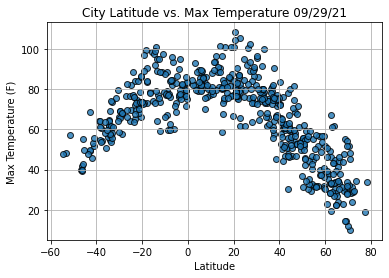

In [21]:


# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

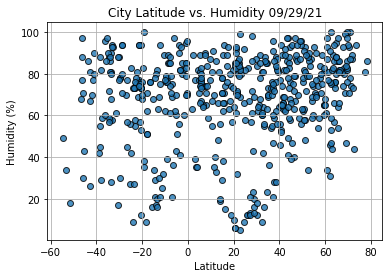

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

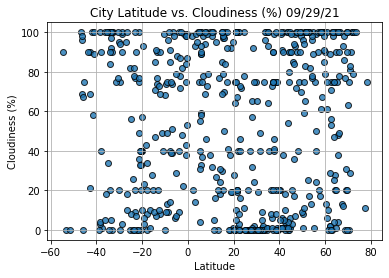

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

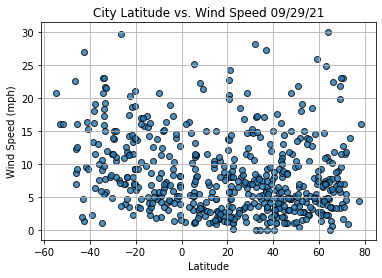

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [41]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


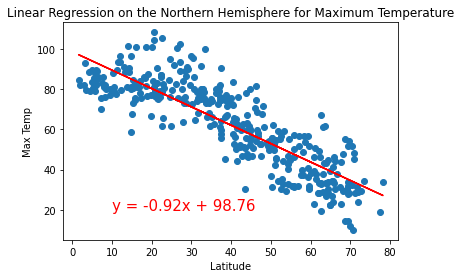

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,20))

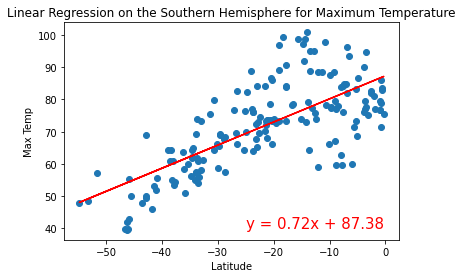

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-25,40))

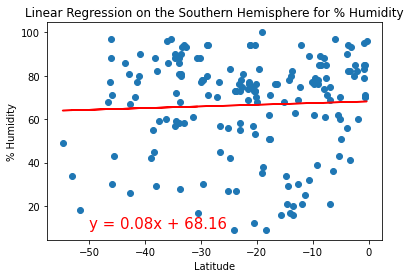

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,10))

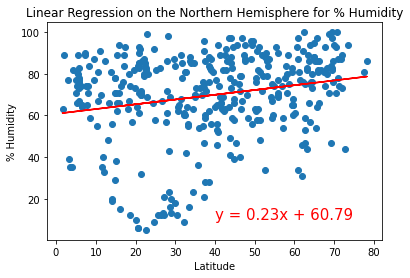

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

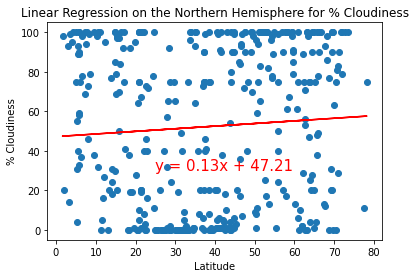

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness','% Cloudiness',(25,30))

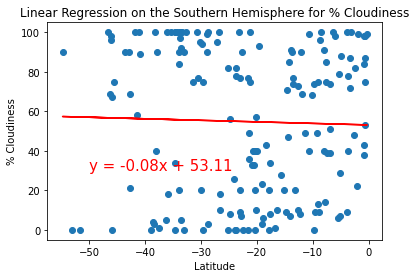

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness','% Cloudiness',(-50,30))

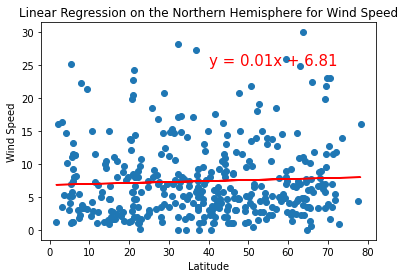

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,25))

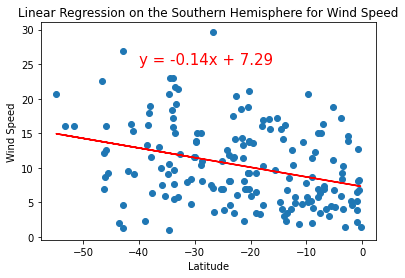

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-40,25))